In [ ]:
import tweepy
auth = tweepy.OAuthHandler('oKsJrSACxit8YoTDM6MPzJvnN', 'rzxMMIQfsSREzD1mQRpvwWEaxPze77mgHbvbDLKsH8cFdN7MtP')
auth.set_access_token('1132508173603102720-8EnFZzrBO1iDoNzM8YmBilfn0LDAM8', 'xr30m23x1hjrGa7oSwEuxyOAbnEvfhZlVj0IKWxlB7cnl')

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

search_term = '#doge -filter:retweets'
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-01-01', tweet_mode='extended').items(5000)
all_tweets = [tweet.full_text for tweet in tweets]

In [ ]:
for tweet in tweets:
    print(tweet.text)

In [ ]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df.head()

,Tweets
0,#tumblr #twitter #facebook #instagram #dogecoi...
1,Reviews of my Twitter: \n\n“Let the dude whose...
2,@MoonconnectNET #MOONCONNECT #moonconnECTNET #...
3,@elonmusk @itsALLrisky @Teslarati @elonmusk is...
4,@ItsDogeCoin Dogecoincash? Yes #dogecoin #doge...


In [ ]:
date = [tweet.created_at for tweet in tweets]
date
all_tweets

['#dogecoin right now. #HODL ya #doge #dogearmy https://t.co/9I1K7YJVgt',
 'If your Pet is a part of the family shop https://t.co/8LcEI7LTzA #dogs #cats #cutedogs  #beauty #hair #barbers #hairstyles #designer #viral #dogecoin #music #Instagram #twitter #doge #shop #velveedajim #followers #ladies #strippers #vixens #onlyfans #puppies',
 '@crypto_8bit Thank you sir Clapping hands sign Hopefully in the future it will get better and develop. if you are consistent in your project.\n@AlvinSofiyan \n@hamdanianwar \n@isara_andi \n\n#doge #BSCGem #bnb #BTC #safemoon #crypto #arcade #casino #lottery',
 '#BTC closed an amazing candle today.  My 👀 are on 42K.  Remember what alts did last time BTC ran hard. \n\n#HBAR #DOGE #ALGO #MATIC #VTHO #ONE',
 '$Doge #dogecoin #dogearmy #doge #dogefam https://t.co/htifgKMtnT',
 'Click video for all the music. #dogecoin #doge #Dogecoinarmy #cryptoart https://t.co/7ByE77AXCP',
 "@AirdropStario Guys, don't miss this opportunity, this project will be a great inve

In [ ]:
tweets_copy

[]

In [ ]:
def cleanTweet(tweet):
  tweet = re.sub('#doge', 'doge', tweet)
  tweet = re.sub('#Doge', 'Doge', tweet)
  tweet = re.sub('#dogecoin', 'dogecoin', tweet)
  tweet = re.sub('#Dogecoin', 'Dogecoin', tweet)
  tweet = re.sub('#[A-Za-z0-9]+', '', tweet)
  tweet = re.sub('\\n', '', tweet)
  tweet = re.sub('https?:\/\/\S+', '', tweet)
  return tweet   

In [ ]:
df['clean_Tweets'] =df['Tweets'].apply(cleanTweet)
df.head()


,Tweets,clean_Tweets
0,#tumblr #twitter #facebook #instagram #dogecoi...,dogecoin doge on purchases over...
1,Reviews of my Twitter: \n\n“Let the dude whose...,Reviews of my Twitter: “Let the dude whose bee...
2,@MoonconnectNET #MOONCONNECT #moonconnECTNET #...,@MoonconnectNET A very interesting and ...
3,@elonmusk @itsALLrisky @Teslarati @elonmusk is...,@elonmusk @itsALLrisky @Teslarati @elonmusk is...
4,@ItsDogeCoin Dogecoincash? Yes #dogecoin #doge...,@ItsDogeCoin Dogecoincash? Yes dogecoin doge D...


In [ ]:
from textblob import TextBlob
def getSubjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity
def getPolarity(tweet):
  return TextBlob(tweet).sentiment.polarity


df['Subjectivity'] = df['clean_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['clean_Tweets'].apply(getPolarity)

df.head()


,Tweets,clean_Tweets,Subjectivity,Polarity
0,#tumblr #twitter #facebook #instagram #dogecoi...,dogecoin doge on purchases over...,0.0,0.000000
1,Reviews of my Twitter: \n\n“Let the dude whose...,Reviews of my Twitter: “Let the dude whose bee...,0.9,-0.333333
2,@MoonconnectNET #MOONCONNECT #moonconnECTNET #...,@MoonconnectNET A very interesting and ...,0.7,0.612500
3,@elonmusk @itsALLrisky @Teslarati @elonmusk is...,@elonmusk @itsALLrisky @Teslarati @elonmusk is...,0.0,0.000000
4,@ItsDogeCoin Dogecoincash? Yes #dogecoin #doge...,@ItsDogeCoin Dogecoincash? Yes dogecoin doge D...,0.0,0.000000


In [ ]:
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.head()

,Tweets,clean_Tweets,Subjectivity,Polarity,Sentiment
0,#tumblr #twitter #facebook #instagram #dogecoi...,dogecoin doge on purchases over...,0.0,0.000000,Neutral
1,Reviews of my Twitter: \n\n“Let the dude whose...,Reviews of my Twitter: “Let the dude whose bee...,0.9,-0.333333,Negative
2,@MoonconnectNET #MOONCONNECT #moonconnECTNET #...,@MoonconnectNET A very interesting and ...,0.7,0.612500,Positive
3,@elonmusk @itsALLrisky @Teslarati @elonmusk is...,@elonmusk @itsALLrisky @Teslarati @elonmusk is...,0.0,0.000000,Neutral
4,@ItsDogeCoin Dogecoincash? Yes #dogecoin #doge...,@ItsDogeCoin Dogecoincash? Yes dogecoin doge D...,0.0,0.000000,Neutral


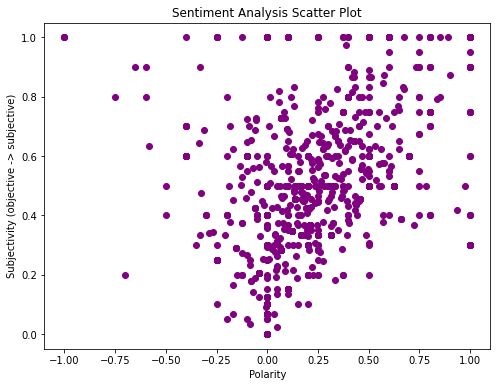

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (objective -> subjective)')
plt.show()

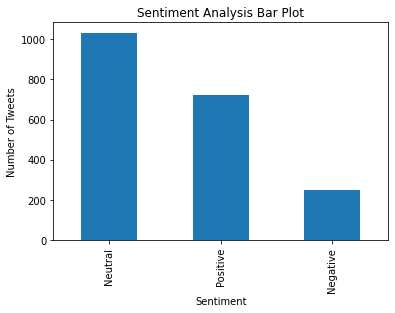

In [ ]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

TypeError: ignored